<a href="https://colab.research.google.com/github/brishtishhhh/Neural-Networks/blob/main/aorta_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import keras
import segmentation_models_3D as sm
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Segmentation Models: using `tf.keras` framework.


In [ ]:
!unzip '/content/drive/MyDrive/aorta seg data (256).zip'

Archive:  /content/drive/MyDrive/aorta seg data (256).zip
   creating: aorta seg data (256)/resized imgs(256)/
  inflating: aorta seg data (256)/resized imgs(256)/K1.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K10.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K11.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K12.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K13.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K14.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K15.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K16.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K17.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K18.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K19.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K2.nii.gz  
  inflating: aorta seg data (256)/resized imgs(256)/K20.nii.gz  
  inflating: aorta seg data (256)/resized imgs

In [ ]:
import glob
image_path_t=glob.glob(r'/content/resized imgs(256)/*.nii.gz')
mask_path_t=glob.glob(r'/content/resized masks(256)/*.nii.gz')

In [ ]:
for x in image_path_t:
  print(x)

/content/aorta seg data (256)/resized imgs(256)/K16.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K1.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K8.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K3.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K9.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K18.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K20.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K4.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K11.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K14.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K12.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K6.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K15.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K19.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K7.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K5.nii.gz
/content/aorta seg data (256)/resized imgs(256)/K2.nii.gz
/conte

In [ ]:
for x in mask_path_t:
  print(x)

/content/aorta seg data (256)/resized masks(256)/K16.nii.gz
/content/aorta seg data (256)/resized masks(256)/K1.nii.gz
/content/aorta seg data (256)/resized masks(256)/K8.nii.gz
/content/aorta seg data (256)/resized masks(256)/K3.nii.gz
/content/aorta seg data (256)/resized masks(256)/K9.nii.gz
/content/aorta seg data (256)/resized masks(256)/K18.nii.gz
/content/aorta seg data (256)/resized masks(256)/K20.nii.gz
/content/aorta seg data (256)/resized masks(256)/K4.nii.gz
/content/aorta seg data (256)/resized masks(256)/K11.nii.gz
/content/aorta seg data (256)/resized masks(256)/K14.nii.gz
/content/aorta seg data (256)/resized masks(256)/K12.nii.gz
/content/aorta seg data (256)/resized masks(256)/K6.nii.gz
/content/aorta seg data (256)/resized masks(256)/K15.nii.gz
/content/aorta seg data (256)/resized masks(256)/K19.nii.gz
/content/aorta seg data (256)/resized masks(256)/K7.nii.gz
/content/aorta seg data (256)/resized masks(256)/K5.nii.gz
/content/aorta seg data (256)/resized masks(256)

In [ ]:
img_arr=[]
mask_arr=[]
for x in image_path_t:
  im=nib.load(x)
  img=np.array(im.dataobj)
  img_arr.append(img)
for y in mask_path_t:
  ma=nib.load(y)
  mask=np.array(ma.dataobj)
  mask_arr.append(mask)

In [ ]:
input_img=np.array(img_arr)
input_mask=np.array(mask_arr)
input_img=np.stack((input_img,)*3,axis=-1)
input_mask=np.expand_dims(input_mask,axis=-1)
input_img=input_img.astype(np.float32)
input_mask=input_mask.astype(np.float32)
print(input_img.shape)
print(input_mask.shape)

(20, 256, 256, 64, 3)
(20, 256, 256, 64, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(input_img,input_mask,test_size=0.2)
print(x_train.shape,y_test.shape)

(16, 256, 256, 64, 3) (4, 256, 256, 64, 1)


In [ ]:
import tensorflow.keras.backend as K
encoder_weights = 'imagenet'
BACKBONE = 'vgg16'  #Try vgg19 also
LR = 0.001
optim = tf.keras.optimizers.Adam(LR)
metrics = [sm.metrics.IOUScore(), sm.metrics.FScore(),'binary_accuracy','Precision','Recall','AUC']

In [ ]:
preprocess_input = sm.get_preprocessing(BACKBONE)
model = sm.Unet(BACKBONE,input_shape=(256,256,64,3),
                encoder_weights='imagenet',activation='sigmoid')
model.compile(optimizer = optim, loss=sm.losses.dice_loss, metrics=metrics)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
es=EarlyStopping(patience=2,monitor='iou_score')
call=[lrp]
history=model.fit(x_train,y_train,
         batch_size=1,
         epochs=30,
         validation_data=(x_test,y_test),
         callbacks=call)

Epoch 1/30
16/16 [==============================] - 93s 5s/step - loss: 0.9906 - iou_score: 0.0047 - f1-score: 0.0094 - binary_accuracy: 0.5909 - precision: 0.0060 - recall: 0.9680 - auc: 0.8853 - val_loss: 0.9937 - val_iou_score: 0.0032 - val_f1-score: 0.0063 - val_binary_accuracy: 0.1616 - val_precision: 0.0033 - val_recall: 0.9999 - val_auc: 0.6281 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - 76s 5s/step - loss: 0.9802 - iou_score: 0.0100 - f1-score: 0.0198 - binary_accuracy: 0.8467 - precision: 0.0150 - recall: 0.9123 - auc: 0.9275 - val_loss: 0.9924 - val_iou_score: 0.0038 - val_f1-score: 0.0076 - val_binary_accuracy: 0.5037 - val_precision: 0.0044 - val_recall: 0.7750 - val_auc: 0.6769 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - 76s 5s/step - loss: 0.9290 - iou_score: 0.0374 - f1-score: 0.0710 - binary_accuracy: 0.9792 - precision: 0.0644 - recall: 0.5257 - auc: 0.8967 - val_loss: 0.9869 - val_iou_score: 0.0066 - val_f1-score: 0.0131 - val

In [ ]:
model.evaluate(x_train,y_train)

31/31 [==============================] - 25s 808ms/step - loss: 0.8401 - iou_score: 0.1149 - f1-score: 0.2010 - binary_accuracy: 0.9854 - precision: 0.6911 - recall: 0.0966 - auc: 0.5629


[0.8400630354881287,
 0.11485010385513306,
 0.20102453231811523,
 0.985378623008728,
 0.6910539865493774,
 0.09656555950641632,
 0.5629467964172363]

In [ ]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 6s 683ms/step - loss: 0.8002 - iou_score: 0.1356 - f1-score: 0.2352 - binary_accuracy: 0.9868 - precision: 0.6141 - recall: 0.1129 - auc: 0.5750


[0.8002074360847473,
 0.13559791445732117,
 0.23518358170986176,
 0.9867910146713257,
 0.6141024231910706,
 0.11287305504083633,
 0.575035035610199]

In [ ]:
test_img = x_train[0]
ground_truth=y_train[0]
test_img_input=np.expand_dims(test_img, 0)
test_pred1 = model.predict(test_img_input)
test_prediction1=(test_pred1>=0.5)
#test_prediction1 = np.argmax(test_pred1, axis=4)
test_prediction1=np.squeeze(test_prediction1,axis=-1)
test_prediction1=np.squeeze(test_prediction1,axis=0)
print(test_prediction1.shape)

1/1 [==============================] - 0s 205ms/step
(256, 256, 64)


In [ ]:
ground_truth_argmax = ground_truth>=0.5
ground_truth_argmax = np.squeeze(ground_truth_argmax, axis = -1)
print(ground_truth_argmax.shape)
print(test_img.shape)

(256, 256, 64)
(256, 256, 64, 3)


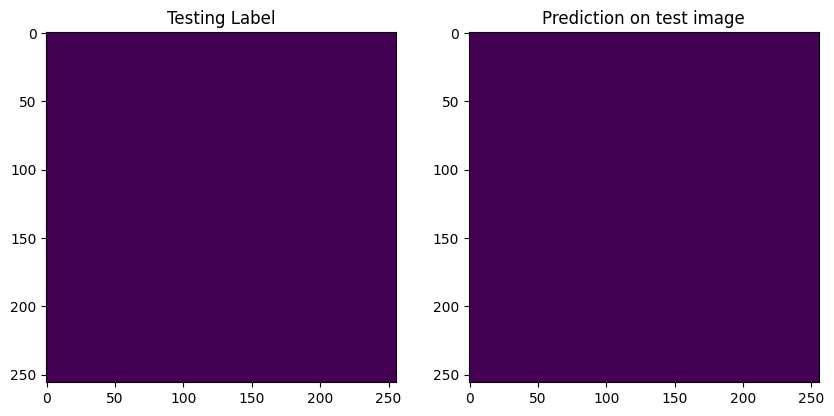

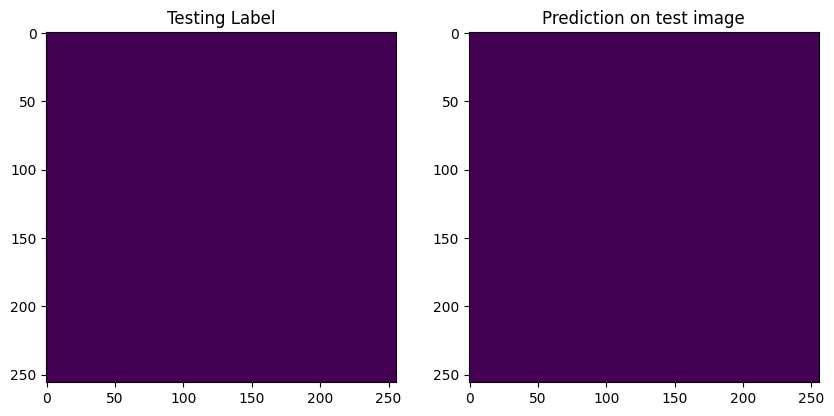

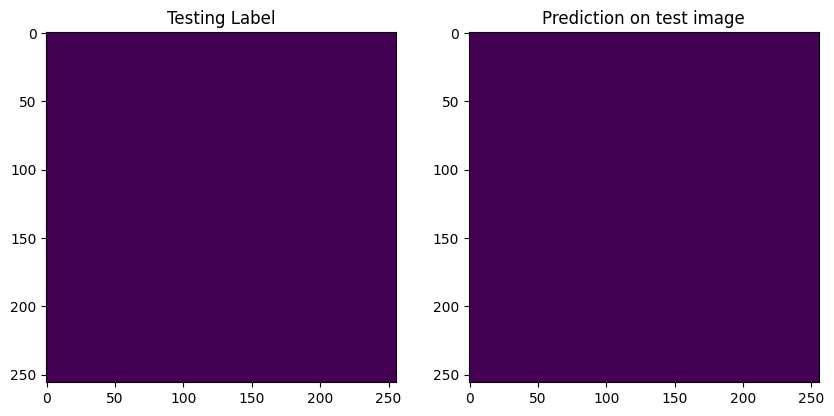

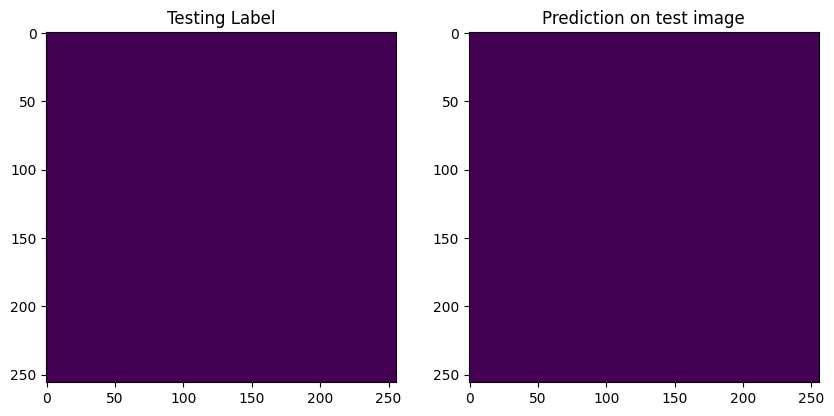

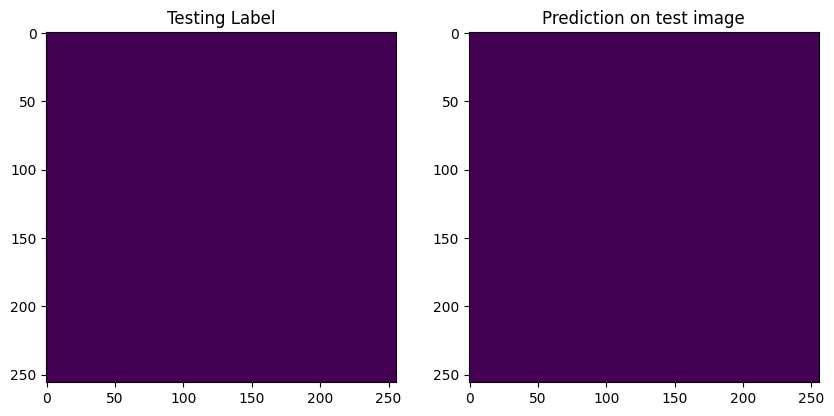

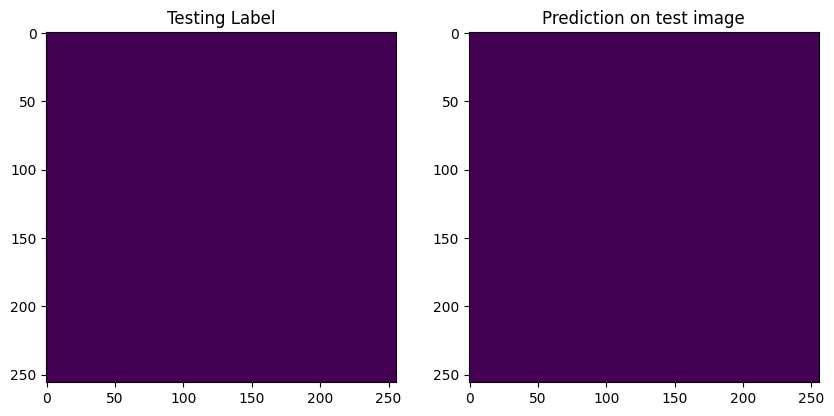

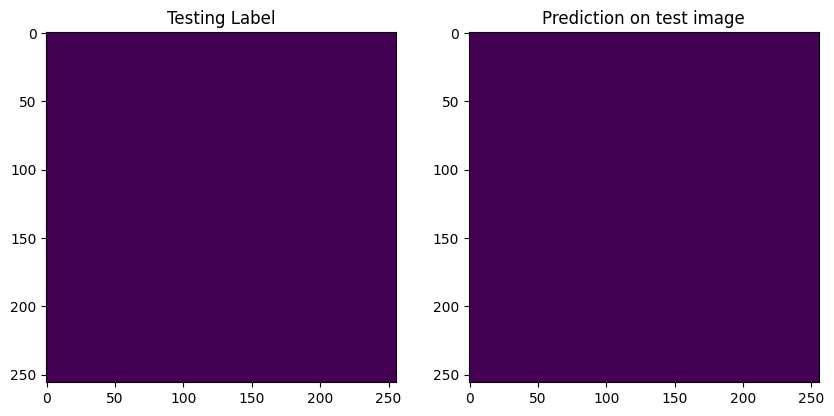

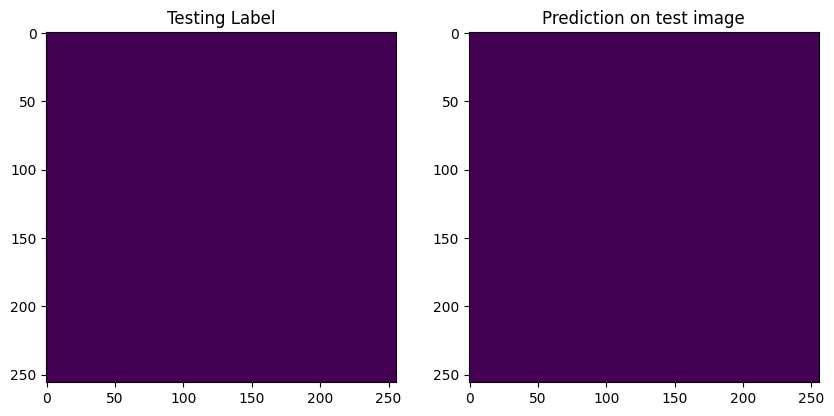

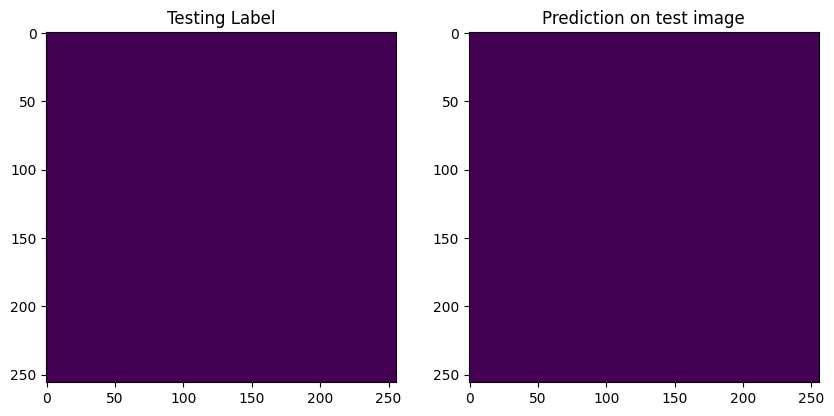

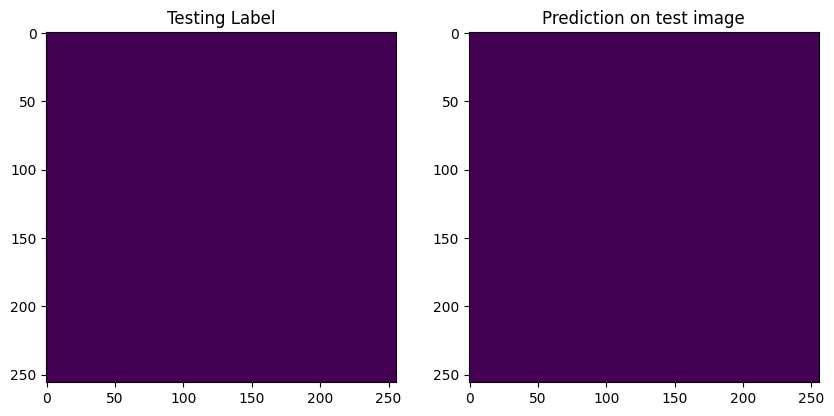

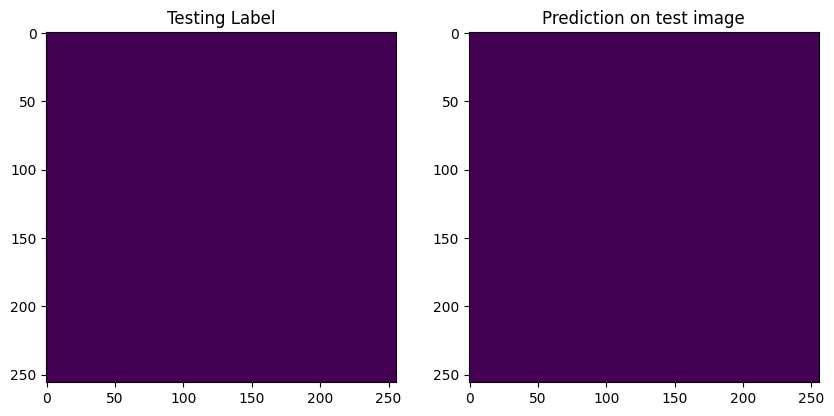

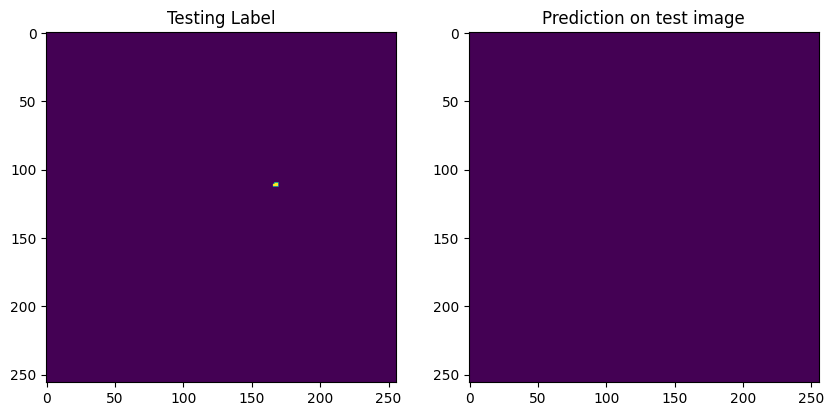

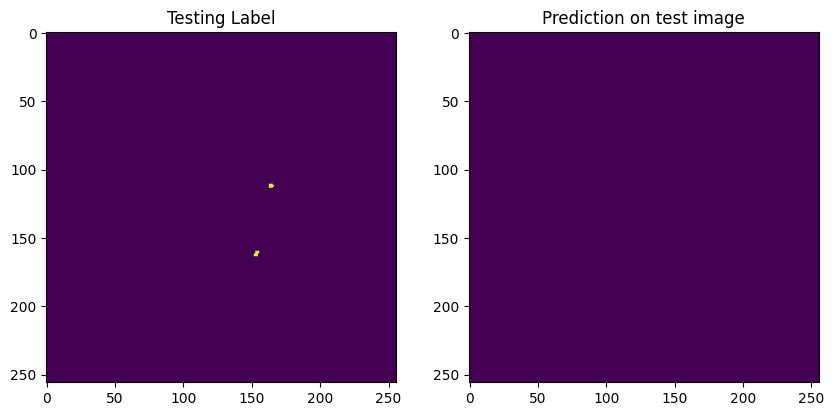

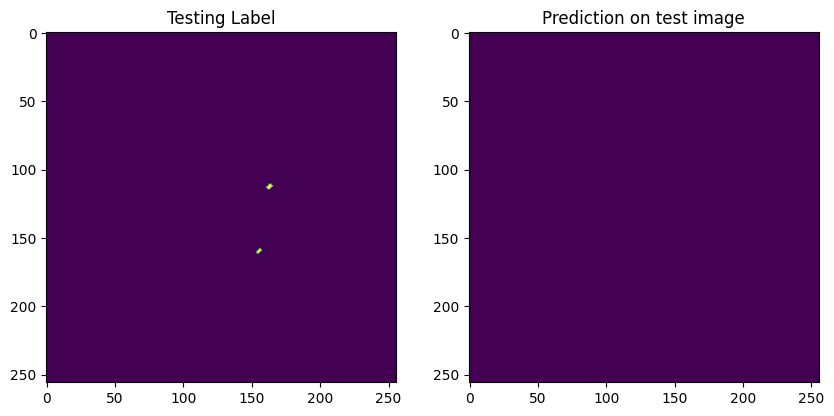

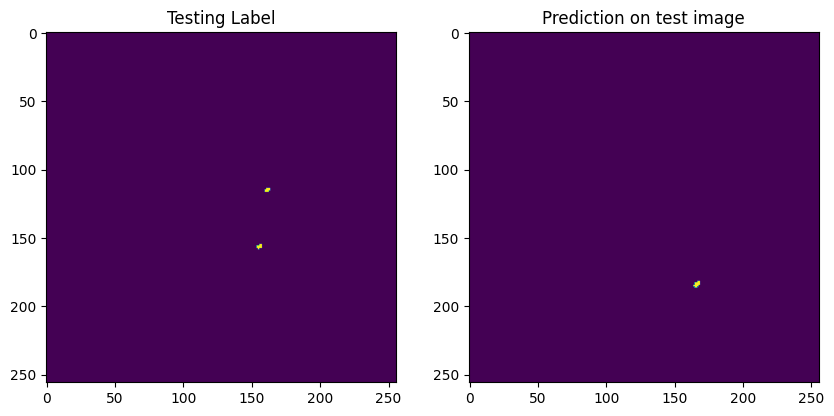

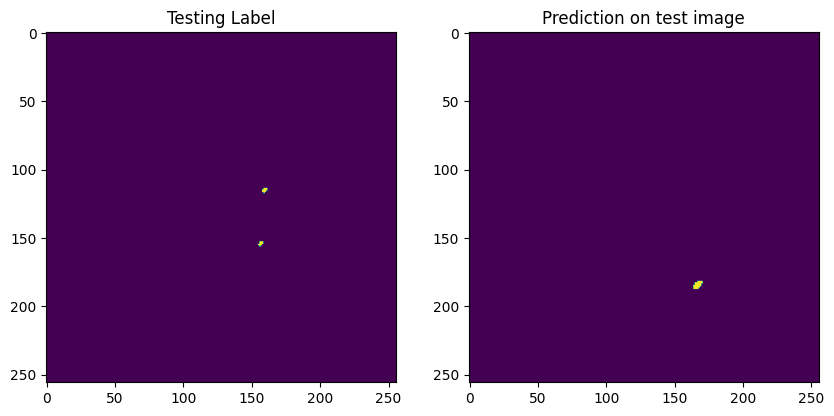

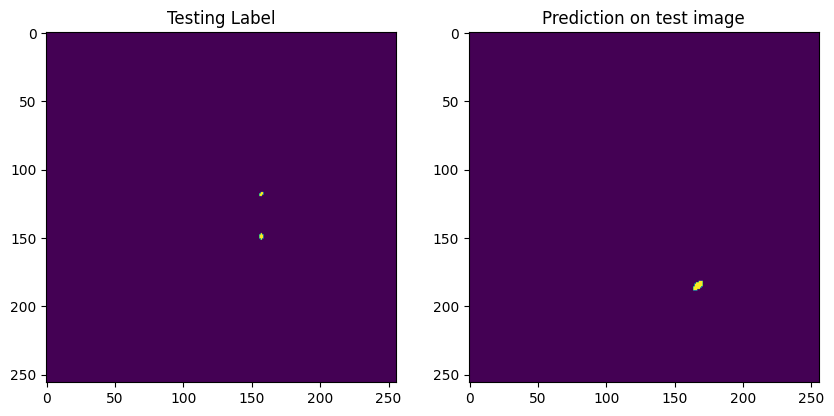

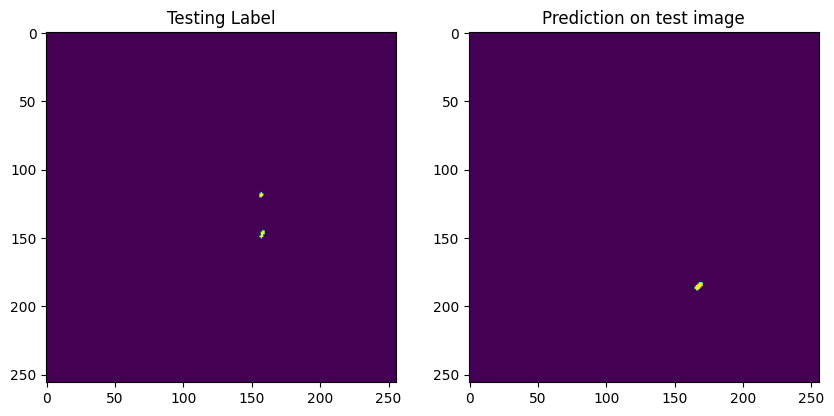

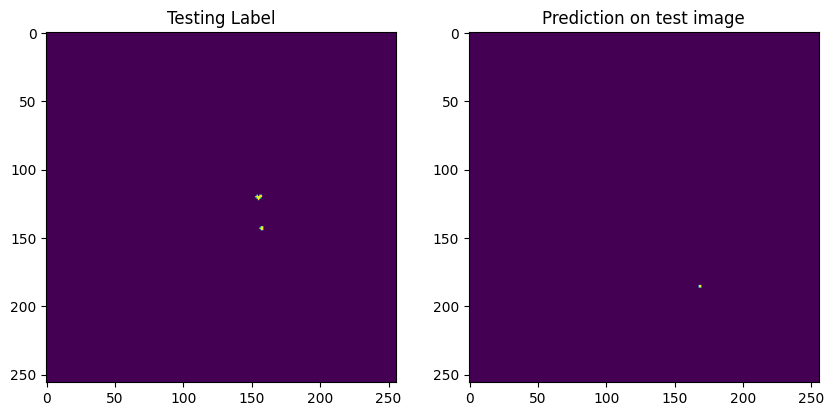

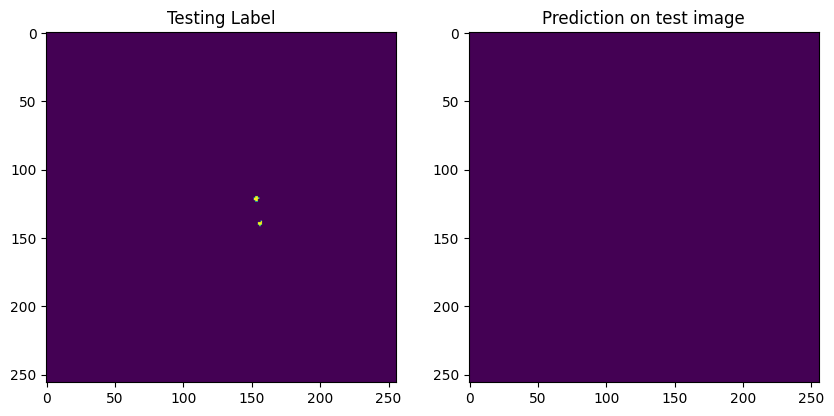

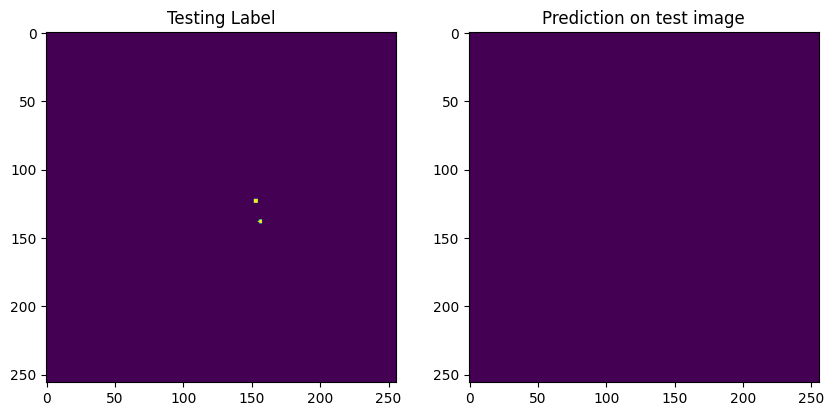

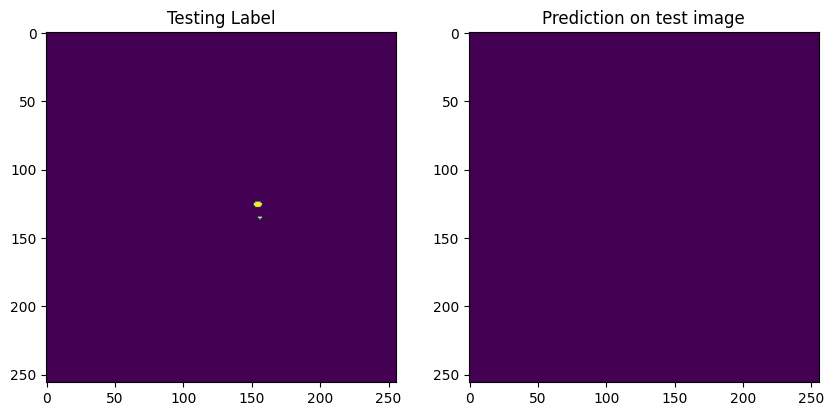

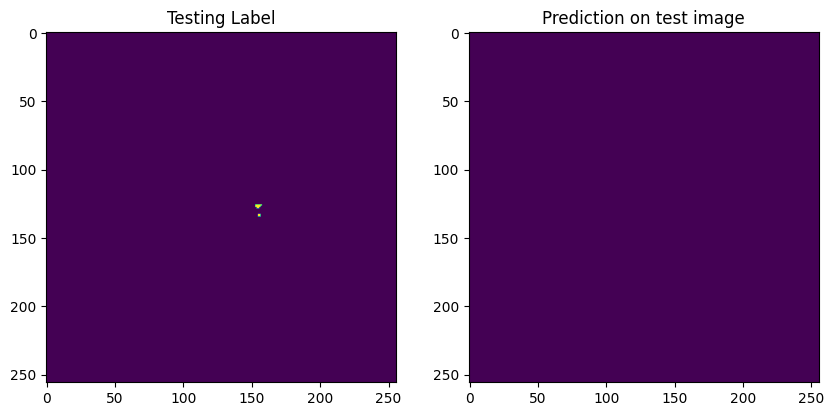

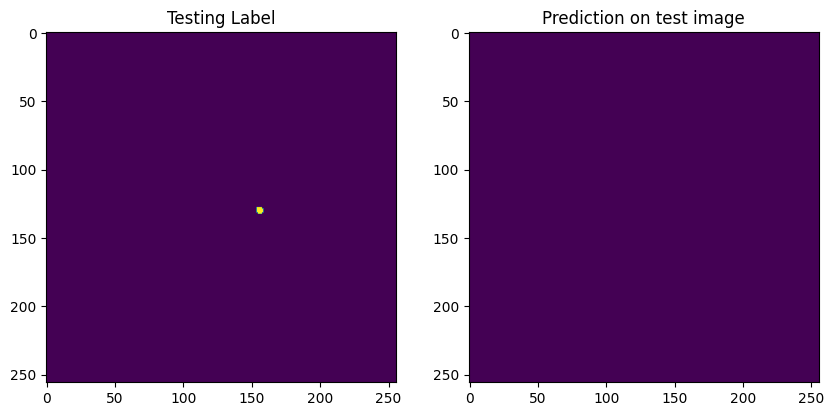

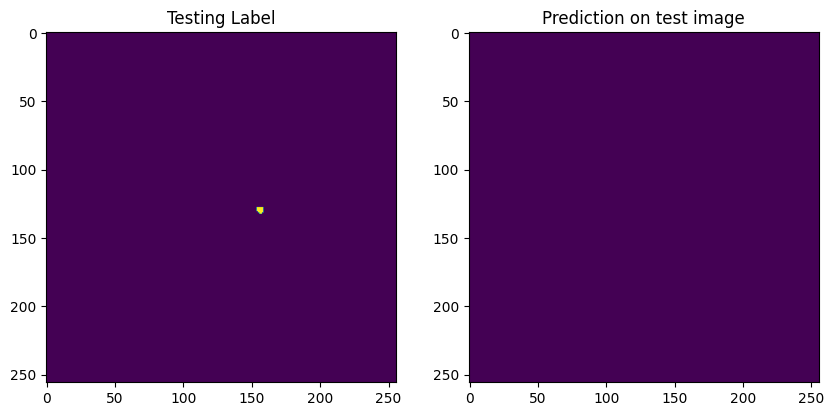

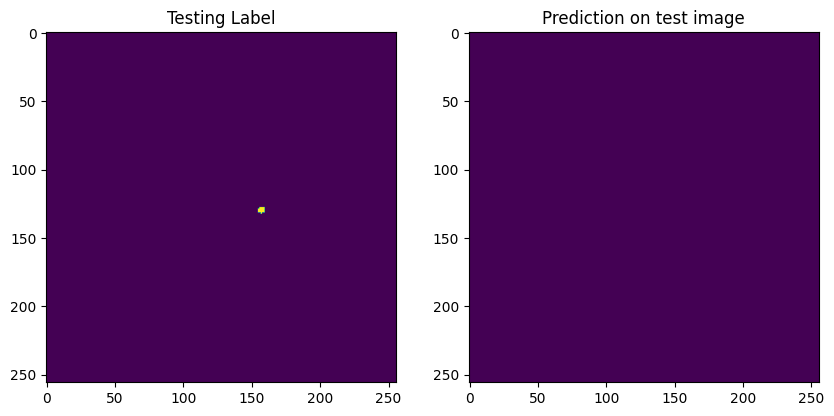

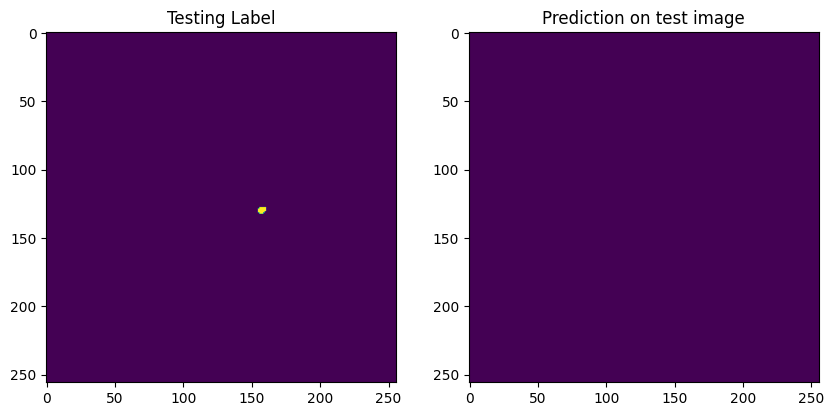

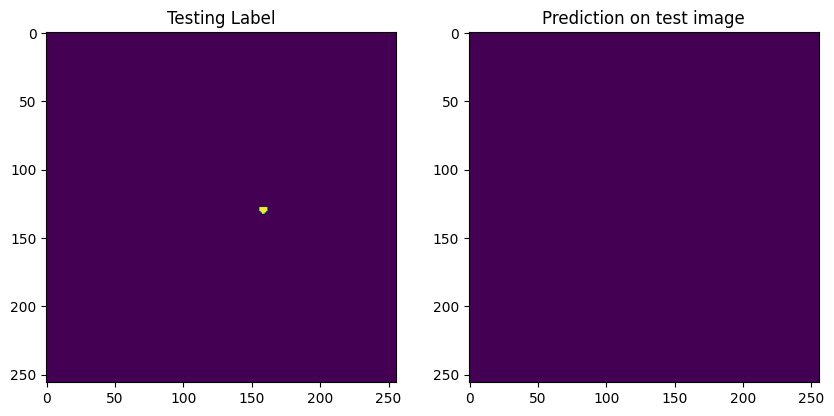

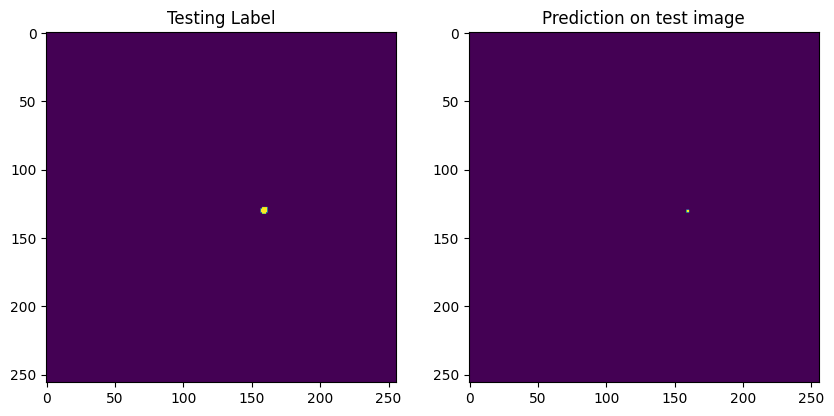

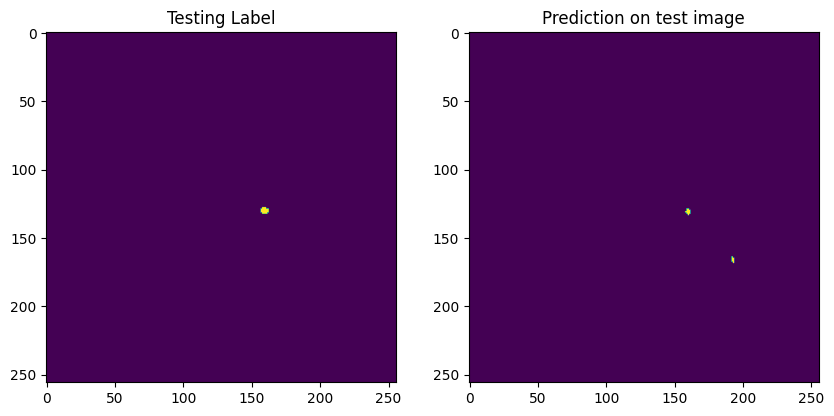

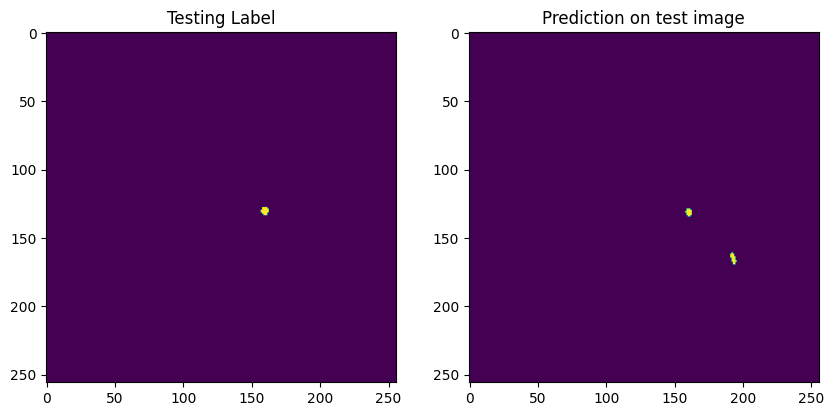

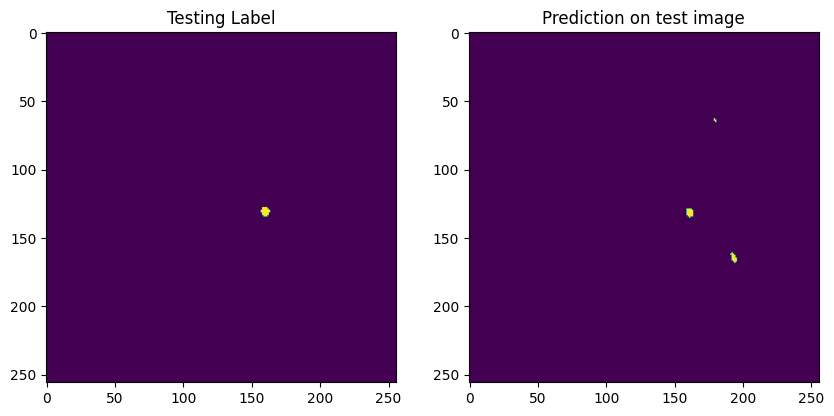

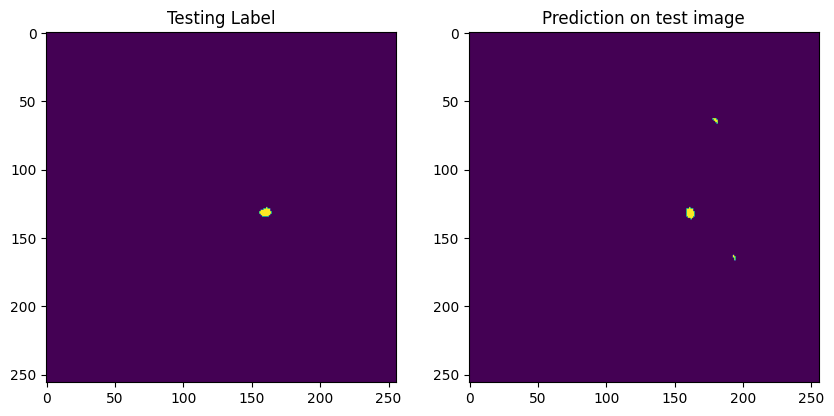

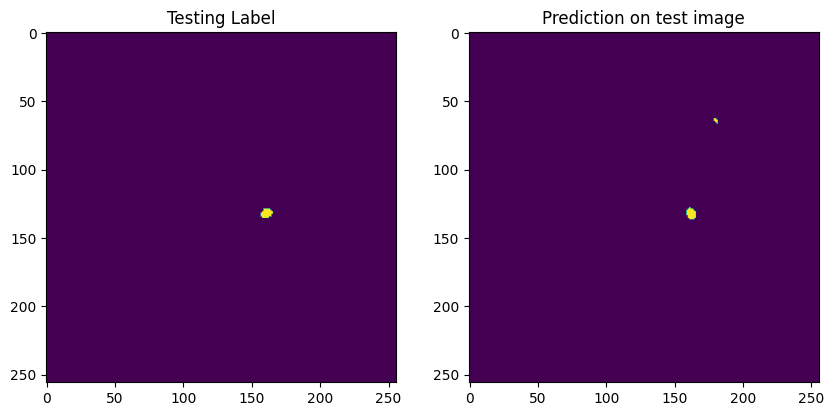

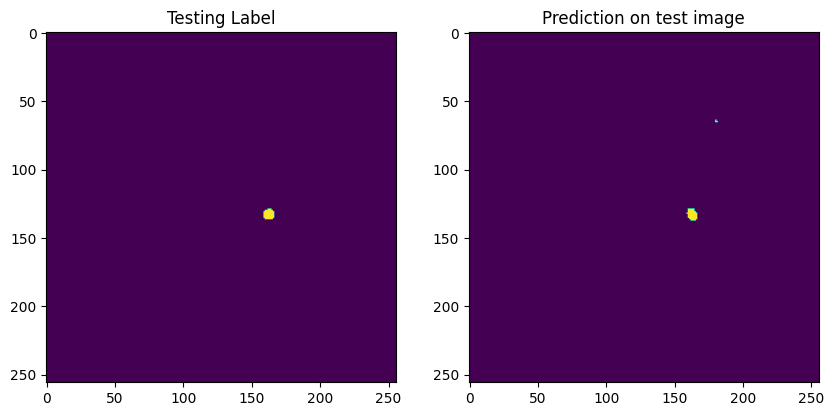

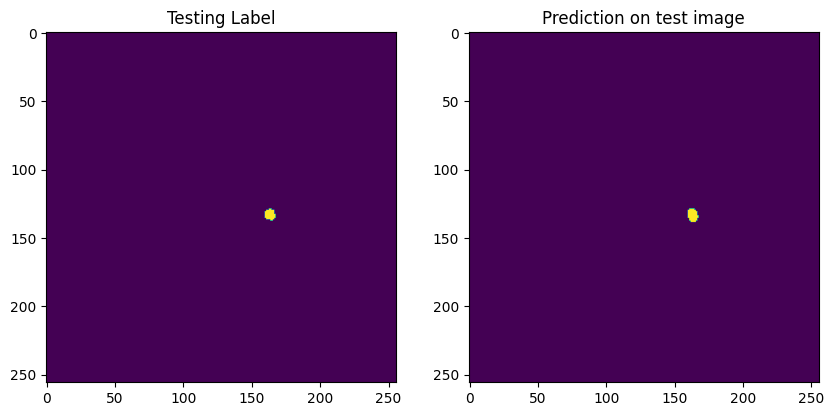

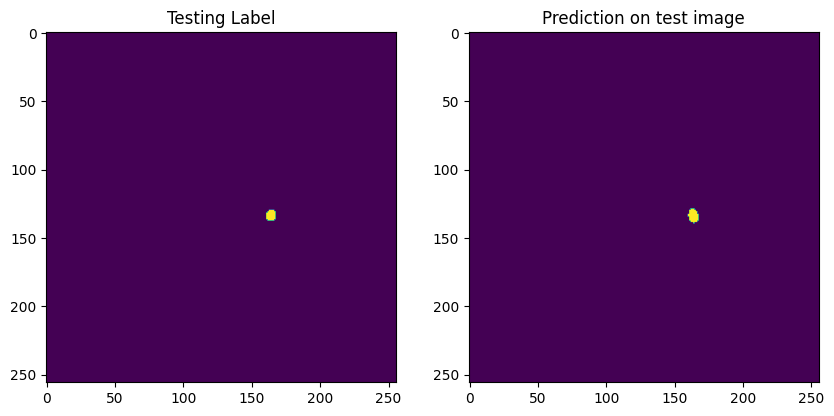

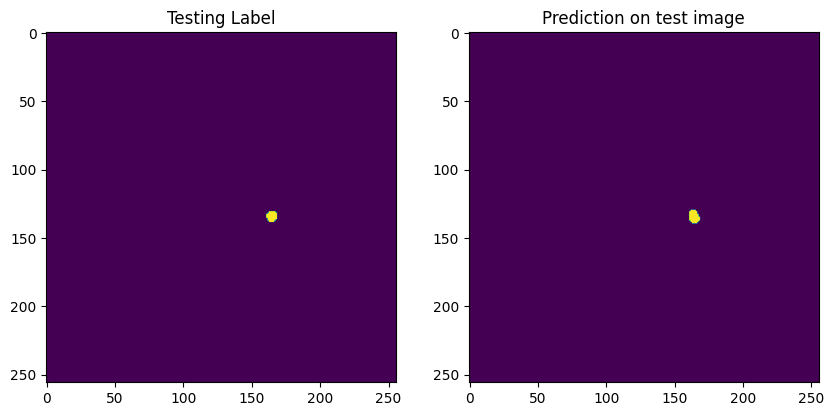

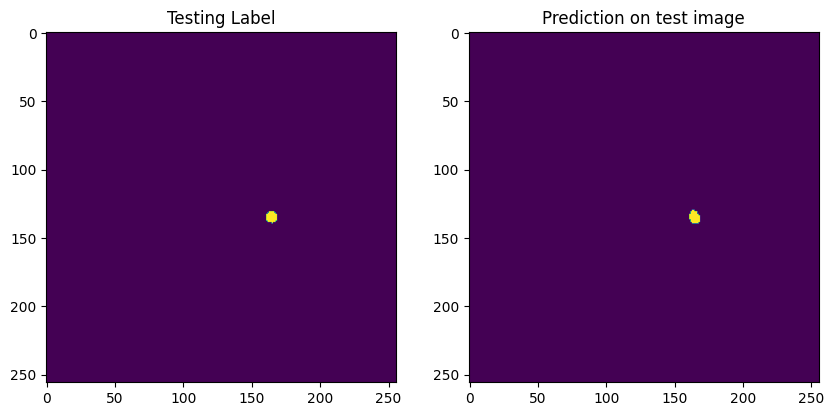

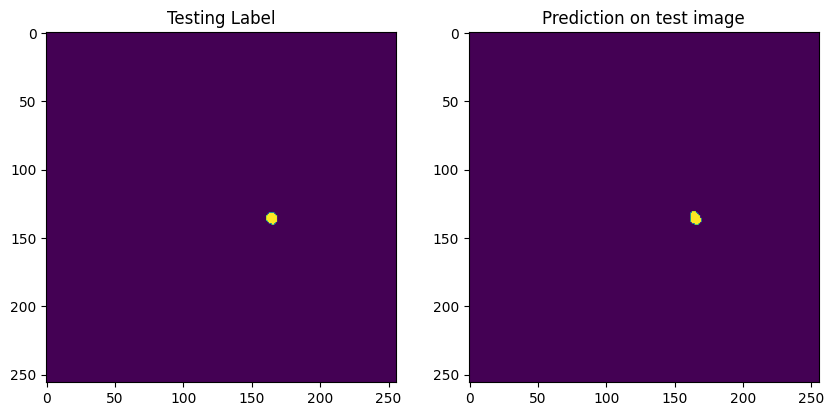

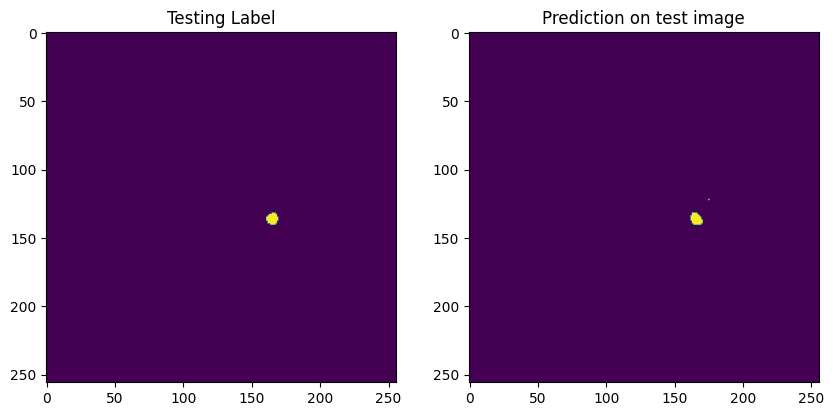

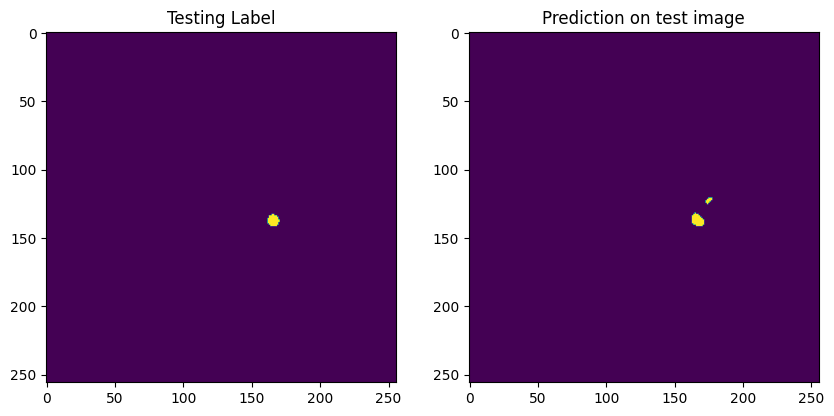

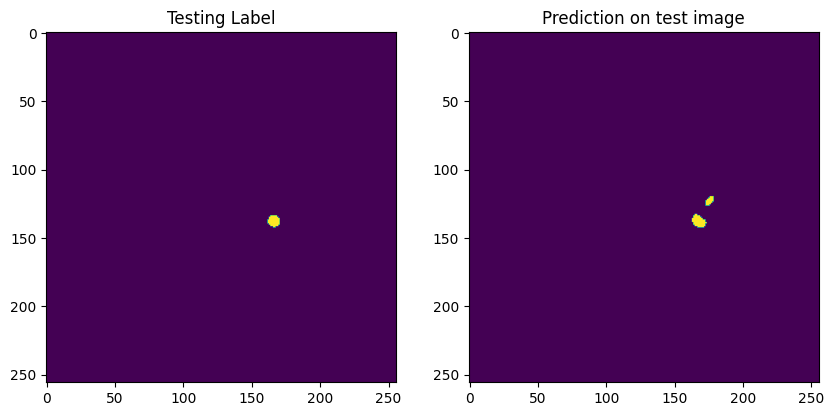

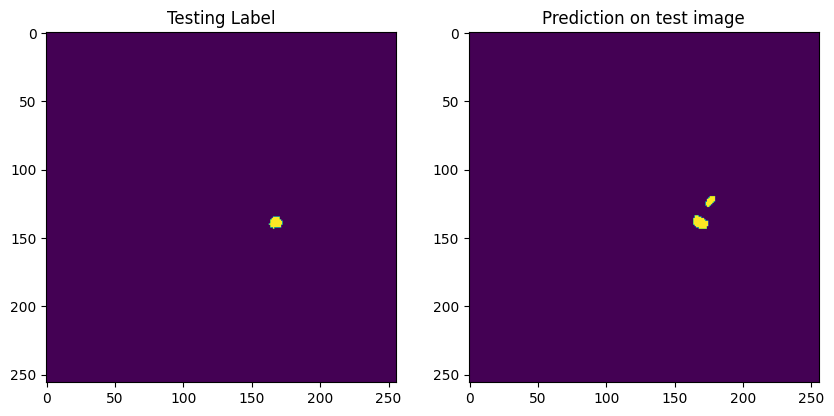

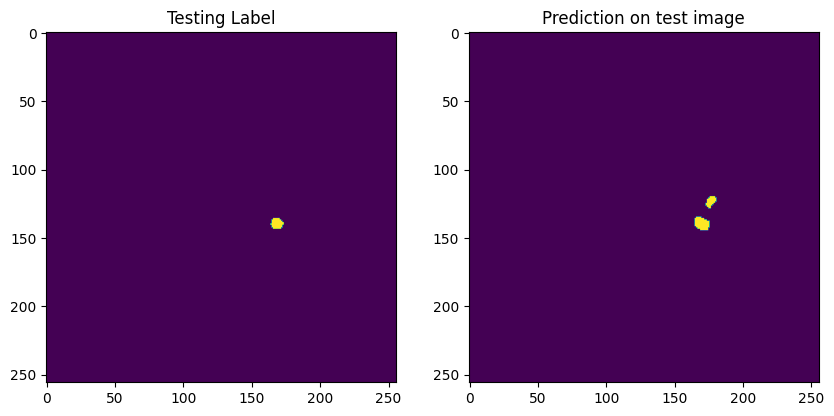

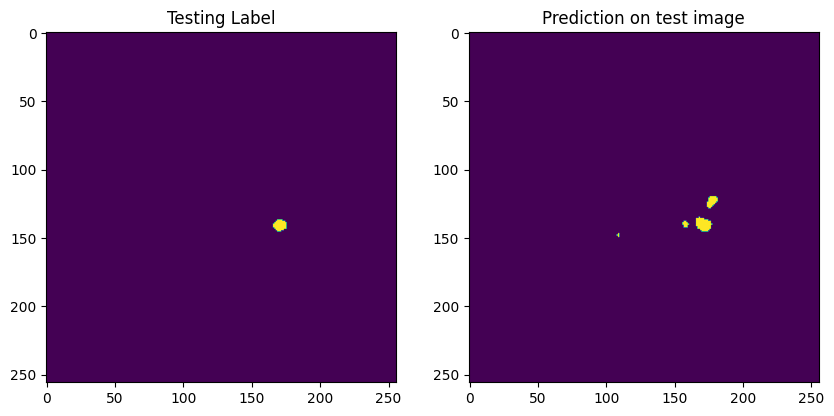

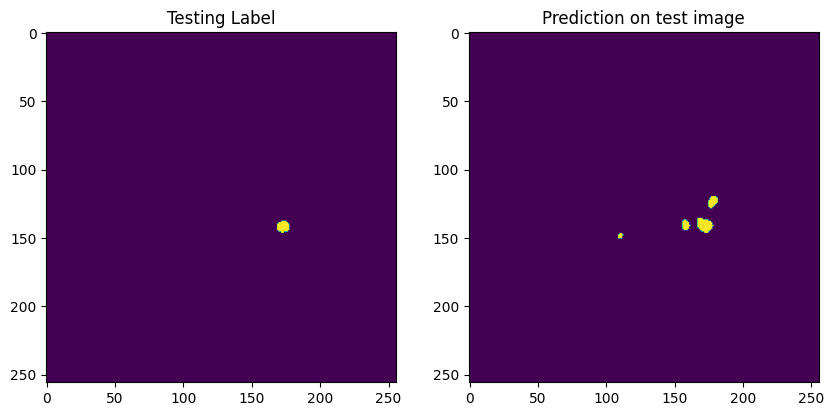

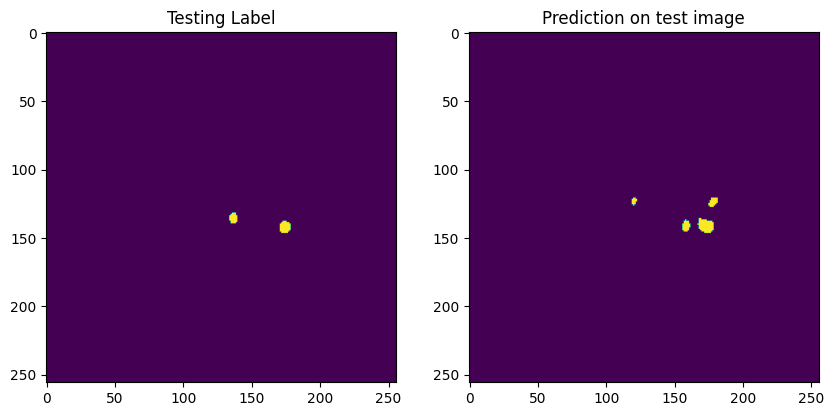

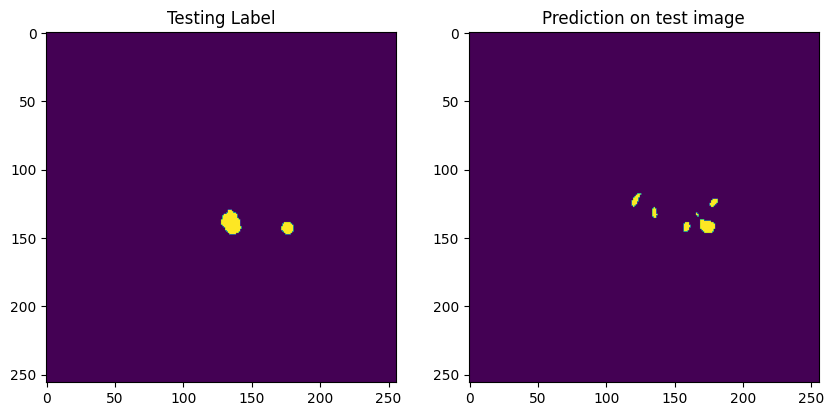

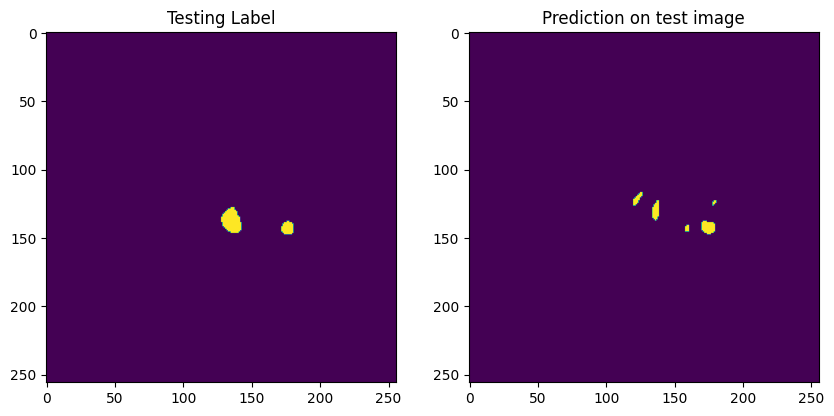

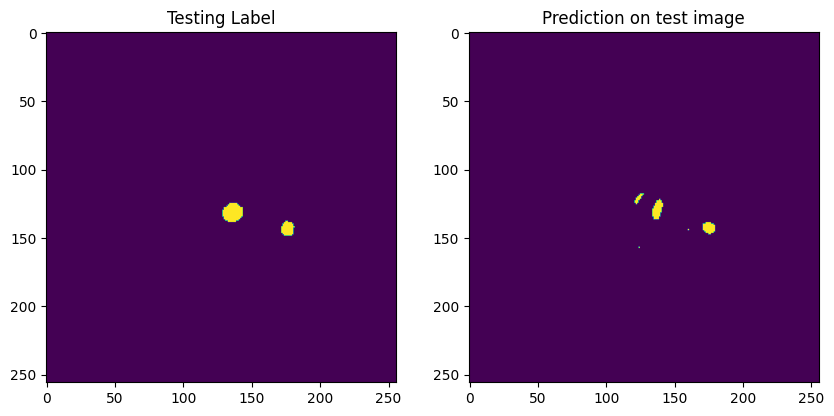

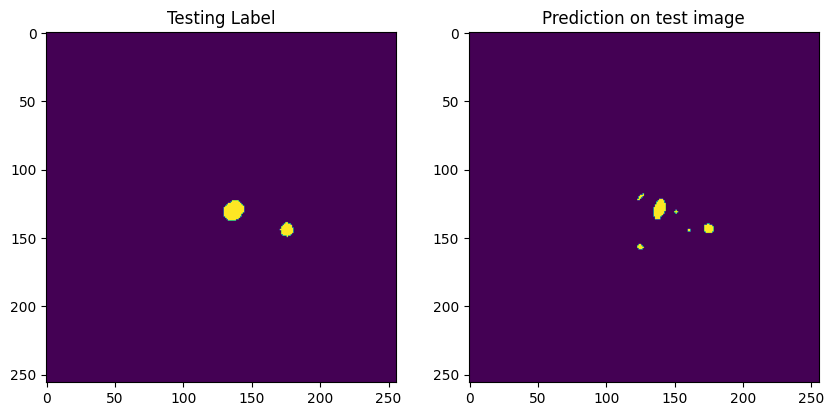

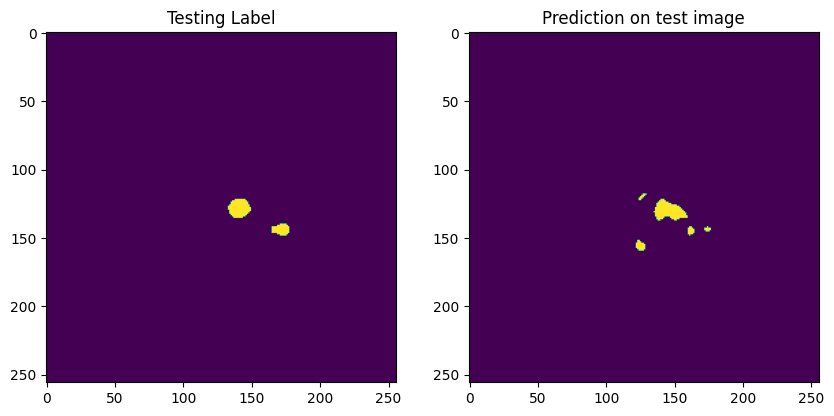

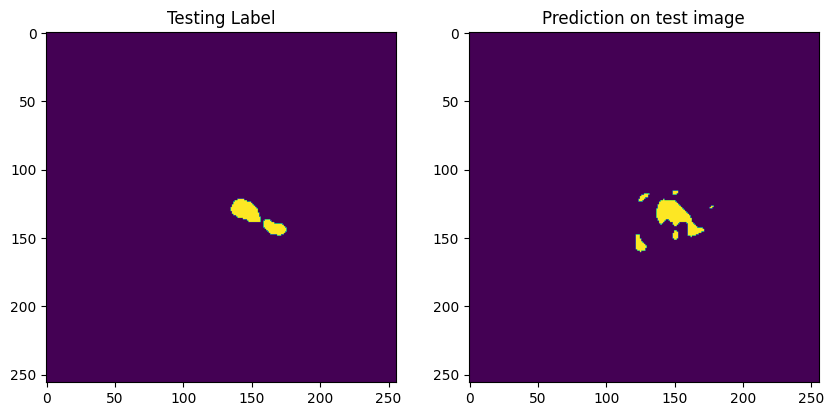

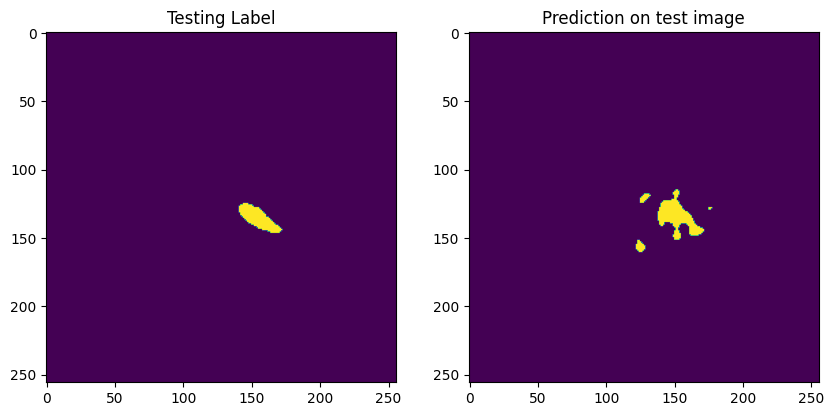

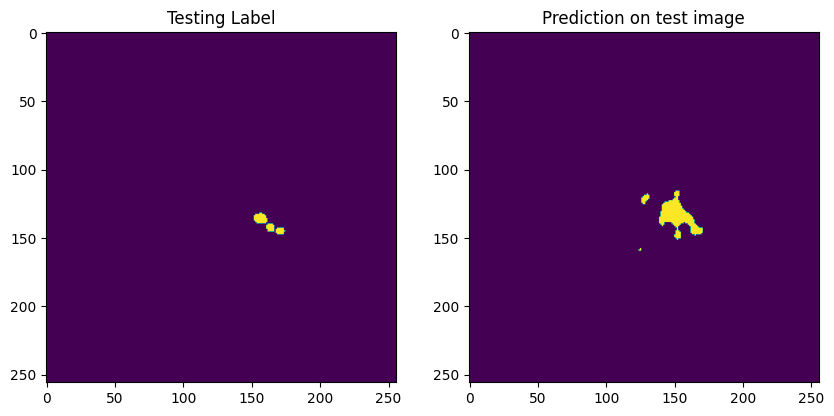

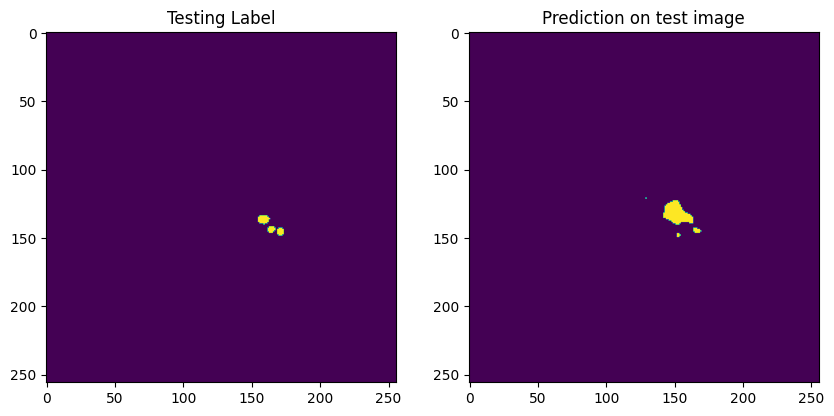

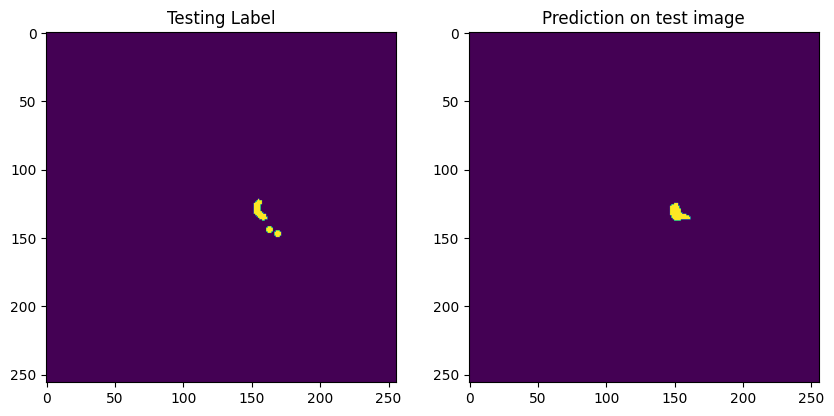

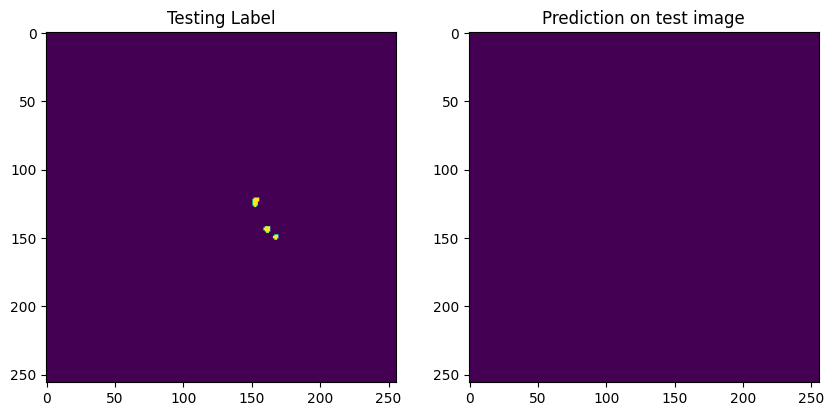

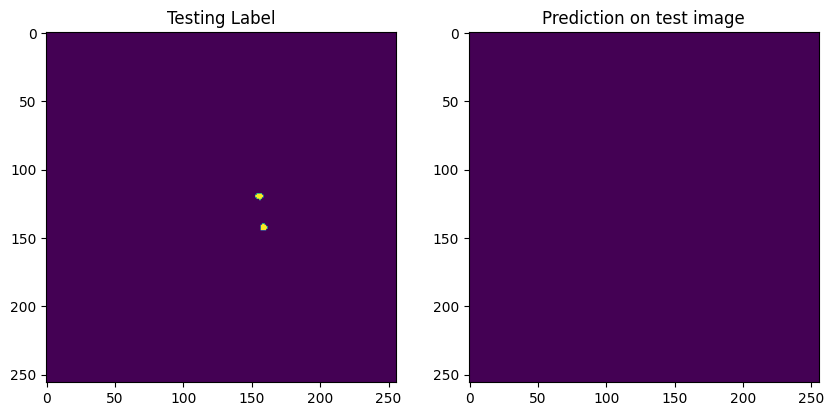

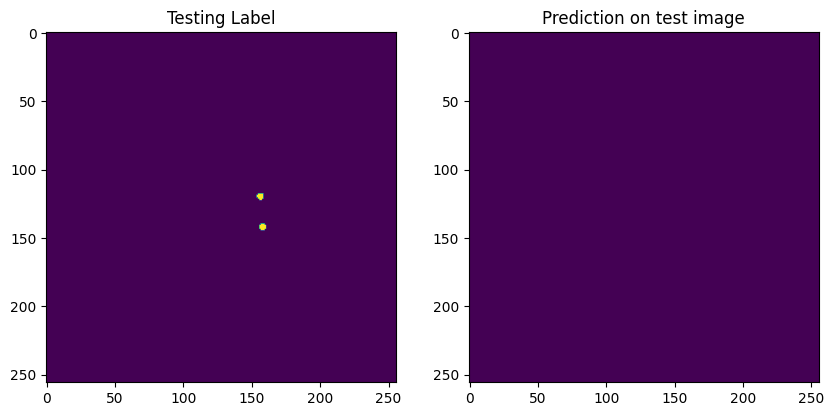

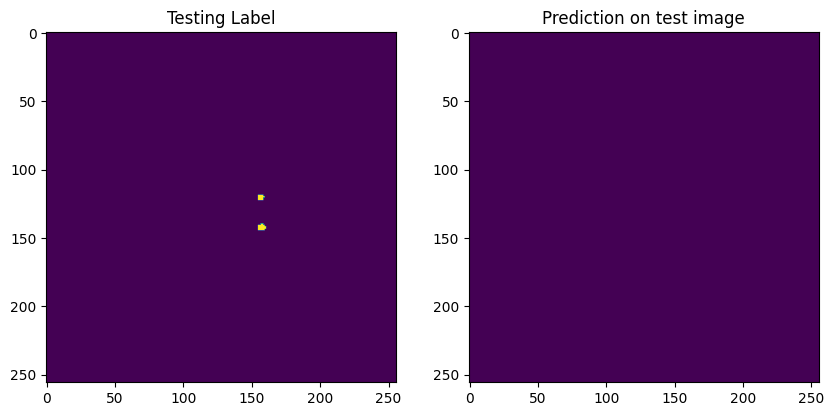

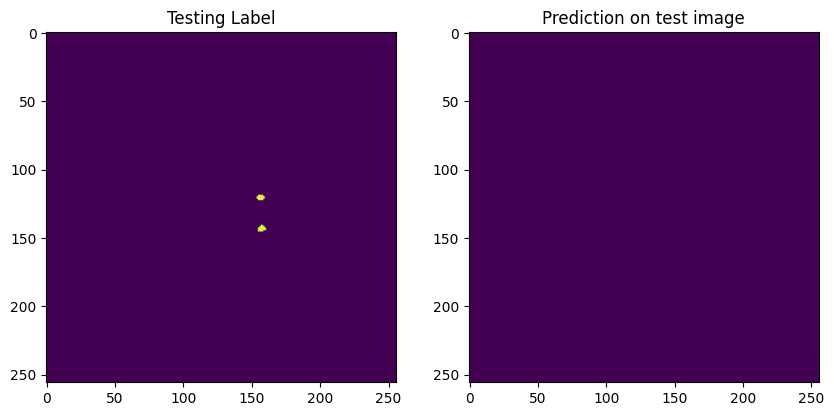

In [ ]:
for x in range(63):
  plt.figure(figsize=(10,10))
  plt.subplot(221)
  plt.title('Testing Label')
  plt.imshow(ground_truth_argmax[:,:,x])
  plt.subplot(222)
  plt.title('Prediction on test image')
  plt.imshow(test_prediction1[:,:,x])
  plt.show()

In [ ]:
test_img=nib.load(r"/content/resized imgs(256)/K1.nii.gz")
test_im=np.array(test_img.dataobj)
test_img_input=np.stack((test_im,)*3, -1)
test_img_input=np.expand_dims(test_img_input,0)
print(test_img_input.shape)
test_pred1 = model.predict(test_img_input)
test_pred1=(test_pred1>=0.5)
test_prediction1 = np.argmax(test_pred1, axis=4)
print(test_prediction1.shape)
print(np.unique(test_pred1))

(1, 256, 256, 64, 3)
1/1 [==============================] - 0s 43ms/step
(256, 256, 64)
[False  True]


In [ ]:
from scipy.ndimage import zoom
import nibabel as nib
reconstructed_image=np.reshape(test_pred1,(256,256,64))
reconstructed_image=reconstructed_image.astype(np.uint8)

In [ ]:
print(test_img.affine)

[[   2.          0.          0.       -127.      ]
 [   0.          2.          0.       -127.      ]
 [   0.          0.         16.546875 -481.953125]
 [   0.          0.          0.          1.      ]]


In [ ]:
out_img=nib.Nifti1Image(reconstructed_image,test_img.affine)
nib.save(out_img,'segmentation-output-k1 (1)')